In [1]:
#importacao de pacotes
import numpy as np
import pandas as pd
import pygwalker  as pyg #exploracao de dados facilmente
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report #calculo das metricas de qualidade (implementacao de ML)
import seaborn as sns #grafico
import plotly.graph_objects as go #grafico 3d

In [ ]:
#funcoes
#degrau bipolar
def degrauBipolar(u):
    return 1 if u >= 0 else -1

#funcao que classifica a amostra com base na rede ja treinada
def previsao(w, x):
    u = np.dot(w.T, x)
    yhat = degrauBipolar(u)
    return yhat

# IMPLEMENTAÇÃO DO PERCEPTRON

In [3]:
#PASSO 1: OBTER O CONJUNTO DE AMOSTRAS DE TREINAMENTO X

#carregar a tabela de dados
data = pd.read_csv("dataset_iris.csv", sep=";")

#analise exploratoria de dados
#walker = pyg.walk(data)

In [4]:
#quantiadade de elementos na amostra
n_sample = data.shape[0] #quantidade de amostras
print(n_sample)

#quantidade variaveis de entrada (subtrair a coluna de tipo)
n_variables = data.shape[1] - 1
print(n_variables)

#separando os dados contendo apenas as variaveis de entrada
x = data.iloc[:, 0:n_variables].values #localizar pelo indice - pega todas as linhas e a coluna de 0 ate n_variables
print(x)

30
3
[[-0.6508  0.1097  4.0009]
 [-1.4492  0.8896  4.4005]
 [ 2.085   0.6876 12.071 ]
 [ 0.2626  1.1476  7.7985]
 [ 0.6418  1.0234  7.0427]
 [ 0.2569  0.673   8.3265]
 [ 1.1155  0.6043  7.4446]
 [ 0.0914  0.3399  7.0677]
 [ 0.0121  0.5256  4.6316]
 [-0.0429  0.466   5.4323]
 [ 0.434   0.687   8.2287]
 [ 0.2735  1.0287  7.1934]
 [ 0.4839  0.4851  7.485 ]
 [ 0.4089 -0.1267  5.5019]
 [ 1.4391  0.1614  8.5843]
 [-0.9115 -0.1973  2.1962]
 [ 0.3654  1.0475  7.4858]
 [ 0.2144  0.7515  7.1699]
 [ 0.2013  1.0014  6.5489]
 [ 0.6483  0.2183  5.8991]
 [-0.1147  0.2242  7.2435]
 [-0.797   0.8795  3.8762]
 [-1.0625  0.6366  2.4707]
 [ 0.5307  0.1285  5.6883]
 [-1.22    0.7777  1.7252]
 [ 0.3957  0.1076  5.6623]
 [-0.1013  0.5989  7.1812]
 [ 2.4482  0.9455 11.2095]
 [ 2.0149  0.6192 10.9263]
 [ 0.2012  0.2611  5.4631]]


In [5]:
#inserindo a coluna do bias
bias = np.ones((n_sample, 1)) * -1 #repete a quantidade de valores quantas vezes quiser
#quero 30 linhas e 1 coluna (o 1 fala que cria n_sample colunas) o 0 fala pra criar n_sample linhas
x = np.hstack((x, bias)) #concatenar x com bias
print(x)

[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876 12.071  -1.    ]
 [ 0.2626  1.1476  7.7985 -1.    ]
 [ 0.6418  1.0234  7.0427 -1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446 -1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316 -1.    ]
 [-0.0429  0.466   5.4323 -1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934 -1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858 -1.    ]
 [ 0.2144  0.7515  7.1699 -1.    ]
 [ 0.2013  1.0014  6.5489 -1.    ]
 [ 0.6483  0.2183  5.8991 -1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762 -1.    ]
 [-1.0625  0.6366  2.4707 -1.    ]
 [ 0.5307  0.1285  5.6883 -1.    ]
 [-1.22    0.7777  1.7252 -1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095 -1.    ]
 [ 2.0149  0.6192 10

In [6]:
#PASSO 2: DO VETOR DE SAIDAS Y, ASSOCIAR A SAIDA ESPERADA Y PARA CADA X
y = data.iloc[:, n_variables].values #pegando todas as linhas da ultima coluna
print(y)

#contar quantas amostras de cada classe existe no dataset
print(f"-1: {(y == -1).sum()}")
print(f"1: {(y == 1).sum()}")

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 14
1: 16


In [7]:
#PASSO 3: INCIALIZAR O VETOR DE PESOS W COM VALORES ALETORIOS
w = np.random.uniform(-1, 1, n_variables + 1) # +1 pq adicionou a coluna do bias n_variavles = 3
print(w) #gera 4 pesos

[ 0.96376607 -0.15072568  0.94030451  0.96028755]


In [8]:
#PASSO 4: DEFINIR A TAXA DE APRENDIZAGEM (0 E 1)
eta = 0.01 # numero magico 0.07

#PASSO 5: CALCULAR O NUMERO DE AMOSTRAS EM X
#ja foi feito e esta em n_sample

#PASSO 6: DEFINIR A TOLERANCIA AO ERRO
tolerancia = 0.01

#PASSO 7: SETAR O MEDIO INICAL MAIOR QUE A TOLERANCIA
erro_medio = tolerancia + 1

#PASSO 8: CRIAR O VETOR QUEU IRA ARMAZENAR O ERRO E TODAS AS EPOCAS DE EPOCA A EPOCA
erros_epocas = []

#PASSO 9: INCIALIZA O CONTADOR DE EPOCAS
epoca = 0

#PASSO 10: DEFINE O MAXIMO DE EPOCAS
maxepocas = 300

In [9]:
#PASSO 11 E 12: SETA OS CRITERIOS DE PARADA
criterio_erro = True
criterio_epocas = True

#PASSO 13: ENQUANTO O ERRO FOR MAIOR QUE A TOLERANCIA E O MAX_EPOCAS NAO FOR ATINGIDO, CONTINUE O TREINO
while(criterio_erro and criterio_epocas):
    #PASSO 14: SETA O ERRO DA EPOCA ATUAL COM ZERO NO INICIO DE CADA EPOCA
    erro_atual = 0

    #PASSO 15: INCREMENTA O CONTADOR DE OPCAS PARA SABER EM QUE EPOCA A RNA ESTA TREINANDO
    epoca+= 1

    #PASSO 16: EMBARALHA OS INDICES PARA BUSCAR AMOSTRAS ALEATORIAMENTE NO CONJUNTO X
    indices_embaralhados = np.random.permutation(n_sample) #permuta todos os valores de 1 ate n_sample

    #PASSO 17: PARA CADA AMOSTRA NO CONJUNTO X FACA
    for i in range(n_sample):
        #captura o indice da amostra a ser apresentada a RNA
        indice_amostra = indices_embaralhados[i]
        
        #captura a amostra atual a ser apresentada a RNA
        xi_amostra = x[indice_amostra, :] # uma linha

        #PASSO 18: CALCULA O POTENCIA DE ATIVACAO U
        u = np.dot(w.T, xi_amostra)

        #PASSO 19: CALCULA A SAIDA PREVISTA COM BASE NA FUNCAO DE ATIVACAO
        yhat = degrauBipolar(u)

        #PASSO 20: CALCULA O ERRO ENTRE O VALOR ESPERADO E O VALOR PREVISTO
        e = y[indice_amostra] - yhat #diferenca do que eu esperava do que previ

        #PASSO 21: APLICAR A REGRA DE HEBB, ATUALIZANDO OS PESOS
        w = w + ((eta * e) * xi_amostra)

        #PASSO 22: ACUMULADOR DE ERROS DE TODAS AS MOSTRAS
        erro_atual += np.abs(e)
    #PASSO 23: CALCULO DO ERRO MEDIO DA EPOCA
    erro_medio = erro_atual/n_sample

    #PASSO 24: ARRMAZENA O ERRO MEDIO DA EPOCA ATUAL NO VETOR DE ERROS DE TODAS AS EPOCAS
    erros_epocas.append(erro_medio)

    #PASSO 25 E 26: VERIFICA E ATUALIZA OS CRITERIOS DE PARADA
    criterio_erro = (erro_medio > tolerancia)
    criterio_epocas = (epoca < maxepocas)

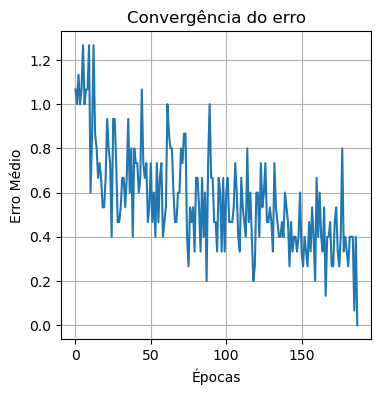

In [10]:
#plotando a convergencia do algoritmo com base no erro epoca a epoca
plt.figure(figsize=(4, 4))
plt.plot(erros_epocas[:maxepocas])
plt.title('Convergência do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.grid(True)
plt.show()

In [11]:
#exibindo os pesos calibrados pela Regra de Hebb
print('Conjunto de peso ideal de pesos w*')
print(w)

print('Épocas necessárias para convergir')
print(epoca)

Conjunto de peso ideal de pesos w*
[ 1.16825007  1.92517832 -0.52402149 -2.15971245]
Épocas necessárias para convergir
188


In [12]:
#cria um vetor para receber todas as prvisoes realizadas pela RNA
yhat = np.zeros(n_sample)

#armazenar todas as previsoes uma para cada amostra
for i in range(n_sample):
    yhat[i] = previsao(w, x[i, :])

print(yhat)

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]


# ANÁLISE DA QUALIDADE DE CLASSIFICAÇÃO

Matriz de Confusão: 
[[14  0]
 [ 0 16]]


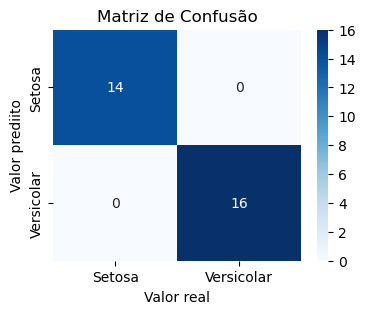

In [13]:
#converter -1 em 0 para melhor visualizar a matriz de confusao
yhat_display = np.where(yhat == -1, 0, yhat) #onde yhat for -1 troque por 0 e armazene em yhat
y_display = np.where(y == -1, 0, y)

#gera a matriz de confusao
cm = confusion_matrix(y_display, yhat_display)
print('Matriz de Confusão: ')
print(cm)

#plotar matriz de confusao crocante
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', #fmt calculo da diagonal
            xticklabels=['Setosa', 'Versicolar'],
            yticklabels=['Setosa', 'Versicolar'])
plt.title('Matriz de Confusão')
plt.xlabel('Valor real')
plt.ylabel('Valor prediito')
plt.show()

In [14]:
#calculo da accuracy
accuracy = np.sum((yhat == y) / n_sample) * 100
print(f"Accuracy = {accuracy} %")

Accuracy = 100.0 %


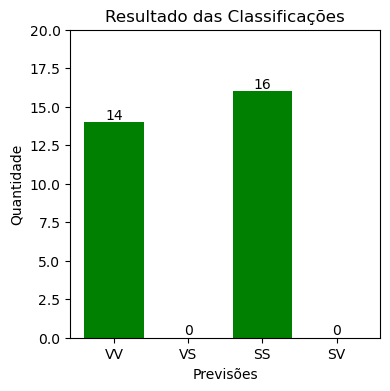

In [15]:
if cm.shape == (2, 2):
   resultado = [cm[0, 0], cm[0, 1], cm[1, 1], cm[1, 0]]
   labels = ['VV', 'VS', 'SS', 'SV']
   colors = ['green', 'red', 'green', 'red']
   
   plt.figure(figsize=(4, 4))
   plt.bar(labels, resultado, color=colors)
   plt.xlabel('Previsões')
   plt.ylabel('Quantidade')
   plt.title('Resultado das Classificações')
   plt.ylim(0, 20)
   for i, v in enumerate(resultado):
      plt.text(i, v + 0.2, str(v), ha='center')
   plt.show()

In [16]:
#criar grafico 3d interativo
colors = ['red' if y == -1 else 'blue' for y in yhat]

#criar malha para o hiperplano
x1_range = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 20)
x2_range = np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

#calcular x3 para o hiperplano: w0*x1 + w1*x2 + w2*x3 + w3*(-1) = 0
#x3 = (w0*x1 + w1*x2 - w3) / (-w2)
x3_grid = (w[0] * x1_grid + w[1] * x2_grid - w[3]) / (-w[2])

fig = go.Figure()

#adicionar o hiperplano
fig.add_trace(go.Surface(
   x=x1_grid,
   y=x2_grid,
   z=x3_grid,
   colorscale='gray',
   opacity=0.3,
   showscale=False,
   name='Hiperplano'
))

#adicionar os pontos
fig.add_trace(go.Scatter3d(
   x=x[:, 0],
   y=x[:, 1],
   z=x[:, 2],
   mode='markers',
   marker=dict(
      size=8,
      color=colors,
      opacity=0.8,
      line=dict(width=1, color='white')
   ),
   name='Amostras'
))

fig.update_layout(
   title='Classificação',
   scene=dict(
      xaxis_title='x1',
      yaxis_title='x2',
      zaxis_title='x3'
   ),
   width=800,
   height=600
)

fig.show()